In [1]:
import os
import pandas as pd
import arviz as az 
pd.options.mode.chained_assignment = None
import math
from scipy.stats import norm
import xarray
import matplotlib.pyplot as plt

In [2]:
#this function is for transforming the plots into the right parameter space
#(for parameters that got phi_approx in the model code)
def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

In [3]:
#change working directory to where netCDF files are stored
#note: code for running model uses az.from_pystan to convert pystan fit into xarray dataset
#and then xarray dataset is exported as a netcdf file
os.chdir('../nc_files')

In [4]:
#extract fit from netcdf file
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')
loss_basic_fit = az. from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')

# independent
loss_pindep_fit = az.from_netcdf('loss_pindep_fit.nc')
outcome_pindep_fit = az.from_netcdf('outcome_pindep_fit.nc')
random_pindep_fit = az.from_netcdf('random_pindep_fit.nc')
reverse_pindep_fit = az.from_netcdf('reverse_pindep_fit.nc')
standard_pindep_fit = az.from_netcdf('standard_pindep_fit.nc')
uncued_pindep_fit = az.from_netcdf('uncued_pindep_fit.nc')

In [5]:
uncued_basic_fit

Inference data with groups:
	> posterior
	> sample_stats

In [6]:
standard_pindep_fit

Inference data with groups:
	> posterior
	> sample_stats

In [13]:
pd.set_option('display.max_rows',350)
az.summary(uncued_pindep_fit).head(10)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_pr[0],-2.012,0.044,-2.095,-1.927,0.001,0.001,959.0,1559.0,1.00
mu_pr[1],-2.138,0.082,-2.299,-1.986,0.004,0.003,450.0,1031.0,1.01
mu_pr[2],-2.478,0.158,-2.807,-2.208,0.010,0.007,250.0,575.0,1.01
mu_pr[3],-1.742,0.605,-2.917,-0.648,0.014,0.010,1813.0,1916.0,1.00
mu_pr[4],0.342,0.275,-0.028,0.870,0.017,0.012,284.0,539.0,1.01
mu_pr[5],0.310,0.168,0.093,0.638,0.010,0.007,238.0,522.0,1.01
mu_pr[6],0.271,0.140,0.087,0.551,0.008,0.006,280.0,472.0,1.01
sigma[0],0.178,0.040,0.113,0.254,0.001,0.001,1091.0,1355.0,1.00
sigma[1],0.361,0.070,0.241,0.489,0.002,0.002,844.0,1311.0,1.00
sigma[2],0.321,0.073,0.190,0.454,0.003,0.002,795.0,1403.0,1.00


In [9]:
# applying transform to max values
import math
# beta, etaP, etaN
max_values = [-2.012, -2.138, -2.478]
transformed_max_values = []

for x in max_values:
    transformed_value = (math.exp((-x**2)/ 2))/ math.sqrt(2 * math.pi)
    transformed_max_values.append(transformed_value)
transformed_max_values

[0.05270681403561342, 0.04058078772143747, 0.018514880234478465]

In [54]:
sif = uncued_pindep_fit.posterior.mu_pr #prints 1 array for each group level parameter
# saf = standard_pindep_fit.posterior
# transformed_saf = transform1(saf)
sif

<xarray.DataArray 'mu_pr' (chain: 4, draw: 1000, mu_pr_dim_0: 7)>
array([[[-2.026198, -2.165999, ...,  0.429129,  0.459352],
        [-2.048493, -2.186088, ...,  0.530818,  0.621645],
        ...,
        [-2.022925, -2.087956, ...,  0.34884 ,  0.337151],
        [-2.00941 , -2.114037, ...,  0.320396,  0.305824]],

       [[-2.046104, -2.187717, ...,  0.192647,  0.190714],
        [-2.047948, -2.188196, ...,  0.228117,  0.179584],
        ...,
        [-2.027625, -2.052688, ...,  0.37809 ,  0.369074],
        [-2.034605, -2.081661, ...,  0.363546,  0.298881]],

       [[-2.000262, -2.133693, ...,  0.416908,  0.397317],
        [-2.033419, -2.095997, ...,  0.389026,  0.398095],
        ...,
        [-1.990452, -2.116472, ...,  0.24369 ,  0.208137],
        [-1.973341, -2.12087 , ...,  0.288308,  0.145605]],

       [[-1.929747, -2.166696, ...,  0.353372,  0.258211],
        [-1.964684, -2.185082, ...,  0.176405,  0.161622],
        ...,
        [-1.996374, -2.297207, ...,  0.264044,  0.199792],
        [-2.114904, -2.222457, ...,  0.482158,  0.402934]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3 4 5 6

In [55]:
class_zero_sif = sif[0][0:1000][1]
class_zero_sif

<xarray.DataArray 'mu_pr' (mu_pr_dim_0: 7)>
array([-2.048493, -2.186088, -2.686767, -2.300745,  0.828727,  0.530818,
        0.621645])
Coordinates:
    chain        int64 0
    draw         int64 1
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3 4 5 6

In [9]:
#print the posterior distributions for each group-level paramaeter 
sbf = standard_basic_fit.posterior.mu_pr #prints 1 array for each group level parameter
sbf

<xarray.DataArray 'mu_pr' (chain: 4, draw: 1000, mu_pr_dim_0: 4)>
array([[[-1.918307, -2.071541, -1.809071,  0.023597],
        [-1.864454, -2.107177, -1.863133,  0.011657],
        ...,
        [-1.933393, -2.109392, -2.220253,  0.03611 ],
        [-1.916395, -2.128687, -2.255706,  0.038109]],

       [[-1.936327, -1.952029, -2.010926,  0.026517],
        [-1.918814, -2.020761, -2.018589,  0.025329],
        ...,
        [-1.824135, -2.154035, -2.192191,  0.020833],
        [-1.797483, -2.140843, -2.140497,  0.025619]],

       [[-1.896075, -1.925061, -1.717491,  0.021297],
        [-1.859918, -2.118187, -1.608683,  0.011259],
        ...,
        [-1.869218, -1.998229, -1.940088,  0.022143],
        [-1.867111, -2.000432, -1.913818,  0.021662]],

       [[-1.938204, -2.028607, -1.898259,  0.019374],
        [-1.924736, -2.004017, -1.780771,  0.025918],
        ...,
        [-1.922988, -2.033469, -1.932625,  0.022212],
        [-1.922638, -2.103712, -1.940575,  0.017769]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3

In [10]:
class_zero_sbf = sbf[0][0:1000]
class_one_sbf = sbf[1][0:1000]
class_two_sbf = sbf[2][0:1000]
class_three_sbf = sbf[3][0:1000]
sbf_array = [class_zero_sbf, class_one_sbf, class_two_sbf, class_three_sbf]

In [11]:
max_df = pd.DataFrame()
max_df.insert(0, "Parameter", ['Beta', 'etapos', 'etaneg', 'm'])
class_num = 1

# iterate through classes
for j in sbf_array:
    
    #set max to neg. infinity
    beta_max = float('-inf')
    etapos_max = float('-inf')
    etaneg_max = float('-inf')
    m_max = float('-inf')
    
    # find max values for each parameter
    for i in j:
        if i[0].values > beta_max:
            beta_max = i[0].values
        if i[1].values > etapos_max:
            etapos_max = i[1].values
        if i[2].values > etaneg_max:
            etaneg_max = i[2].values
        if i[3].values > m_max:
            m_max = i[3].values
    
    max_df.insert(class_num, str(class_num-1), [beta_max, etapos_max, etaneg_max, m_max])
    class_num += 1
    
# Calculate average of the max values for each parameter
max_df['Average Max'] = max_df.loc[:, max_df.columns != 'Parameter'].mean(axis=1)
max_df

,Parameter,0,1,2,3,Average Max
0,Beta,-1.7425744386255728,-1.7535102226270456,-1.7510899688771837,-1.7252199893676594,-1.743099
1,etapos,-1.8300529063921416,-1.7471689872913865,-1.7561463841253953,-1.857307872983763,-1.797669
2,etaneg,-1.5083768654602707,-1.4151343605330593,-1.3988174750436484,-1.3738391980996956,-1.424042
3,m,0.05803084727005252,0.04969515700134267,0.06603815731798171,0.056516874489951595,0.057570


In [45]:
uncued_basic_fit.posterior.mu_pr

<xarray.DataArray 'mu_pr' (chain: 4, draw: 1000, mu_pr_dim_0: 4)>
array([[[-1.509723, -2.401326, -1.511898,  0.029564],
        [-1.671181, -2.286256, -1.388097,  0.020082],
        ...,
        [-1.544192, -2.377212, -1.889349,  0.037092],
        [-1.569644, -2.393245, -1.931448,  0.039329]],

       [[-1.595073, -2.373073, -1.650282,  0.012738],
        [-1.354704, -2.532652, -1.601037,  0.014281],
        ...,
        [-1.30475 , -2.315303, -1.752403,  0.017045],
        [-1.626895, -2.432161, -1.63747 ,  0.021104]],

       [[-1.710771, -2.356389, -1.649932,  0.036324],
        [-1.645685, -2.393015, -1.696341,  0.061083],
        ...,
        [-1.613619, -2.320102, -1.529688,  0.02113 ],
        [-1.622863, -2.321453, -1.489366,  0.02228 ]],

       [[-1.347548, -2.200376, -1.586802,  0.015113],
        [-1.523315, -2.310747, -1.681228,  0.034169],
        ...,
        [-1.426364, -2.585811, -1.339534,  0.016923],
        [-1.581431, -2.203761, -1.578768,  0.01818 ]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * mu_pr_dim_0  (mu_pr_dim_0) int64 0 1 2 3

In [46]:
#print just the values of the array(s)
import numpy as np
standard_basic_fit.posterior.mu_pr.values.max()

0.06603815731798171

array([[<AxesSubplot:title={'center':'mu_pr'}>,
        <AxesSubplot:title={'center':'mu_pr'}>]], dtype=object)

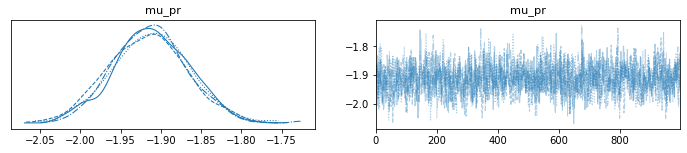

In [51]:
#extract posterior distribution for each group level parameter and plot them

#figures on left == posterior distribution for each of the chains --> should all overlap
#figures on right == trace plot for all four chains
#trace plot is a graph of the sampled parameter values as a function of the step in the chain 

# az.plot_trace(standard_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0,1,2,3]})
az.plot_trace(standard_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0]})

array([[<AxesSubplot:title={'center':'mu_pr'}>,
        <AxesSubplot:title={'center':'mu_pr'}>]], dtype=object)

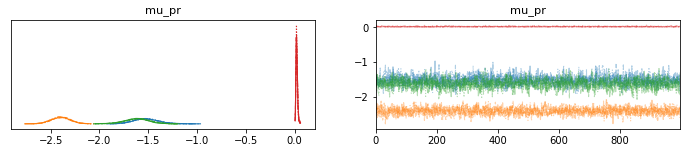

In [50]:
az.plot_trace(uncued_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0,1,2,3]})

In [11]:
#print summary statistics 
#xarray.set_options(display_max_rows=264)
summary_fit = az.summary(standard_basic_fit)
pd.set_option('display.max_rows', summary_fit.shape[0]+1)
# print(summary_fit) #prints all rows 

In [12]:
# can convert to pandas dataframe (made no changes, runs fine) 
standard_basic_df = standard_basic_fit.to_dataframe()
# standard_basic_df.keys()
standard_basic_df

,chain,draw,"(posterior, mu_pr[0], 0)","(posterior, mu_pr[1], 1)","(posterior, mu_pr[2], 2)","(posterior, mu_pr[3], 3)","(posterior, sigma[0], 0)","(posterior, sigma[1], 1)","(posterior, sigma[2], 2)","(posterior, sigma[3], 3)",...,"(posterior, m[7], 7)","(posterior, m[8], 8)","(posterior, m[9], 9)","(sample_stats, accept_stat)","(sample_stats, stepsize)","(sample_stats, treedepth)","(sample_stats, n_leapfrog)","(sample_stats, diverging)","(sample_stats, energy)","(sample_stats, lp)"
0,0,0,-1.918307,-2.071541,-1.809071,0.023597,0.237268,0.251718,0.789284,0.022918,...,0.028415,0.027724,0.009765,0.976223,0.030468,7,127,False,12076.196623,-12006.391883
1,0,1,-1.864454,-2.107177,-1.863133,0.011657,0.296936,0.288958,0.651616,0.020926,...,-0.001444,0.041641,0.006466,0.984845,0.030468,7,127,False,12074.138511,-12005.695312
2,0,2,-1.969958,-2.045655,-1.996137,0.022625,0.236245,0.290810,0.692128,0.022082,...,0.014473,0.039505,0.012666,0.957191,0.030468,7,127,False,12070.723615,-12001.818063
3,0,3,-1.977412,-2.019254,-1.969270,0.018196,0.218926,0.284121,0.756763,0.021664,...,-0.001475,0.062244,0.010147,0.985194,0.030468,7,127,False,12066.648149,-12003.382069
4,0,4,-2.005118,-2.101969,-1.995664,0.033630,0.154588,0.352861,0.755119,0.025145,...,0.015535,0.056068,0.031086,0.894022,0.030468,7,255,False,12070.321721,-11999.743298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,995,-1.899849,-2.024769,-1.983187,0.040364,0.243161,0.314658,0.640877,0.034378,...,-0.010404,0.041910,0.003792,0.932857,0.038529,7,127,False,12042.834723,-11990.293643
3996,3,996,-1.955664,-2.061708,-1.788127,0.003452,0.142862,0.365067,0.727549,0.021623,...,0.017887,0.043740,0.015741,0.877475,0.038529,7,127,False,12047.676634,-11991.495002
3997,3,997,-1.930561,-2.005179,-1.906500,0.001898,0.167937,0.322565,0.583098,0.042030,...,-0.006448,0.053549,0.008129,0.794425,0.038529,7,127,False,12053.060246,-11993.495781
3998,3,998,-1.922988,-2.033469,-1.932625,0.022212,0.156632,0.394064,0.890834,0.022179,...,0.019121,0.041820,0.010626,0.986407,0.038529,7,127,False,12049.546817,-11974.992702


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

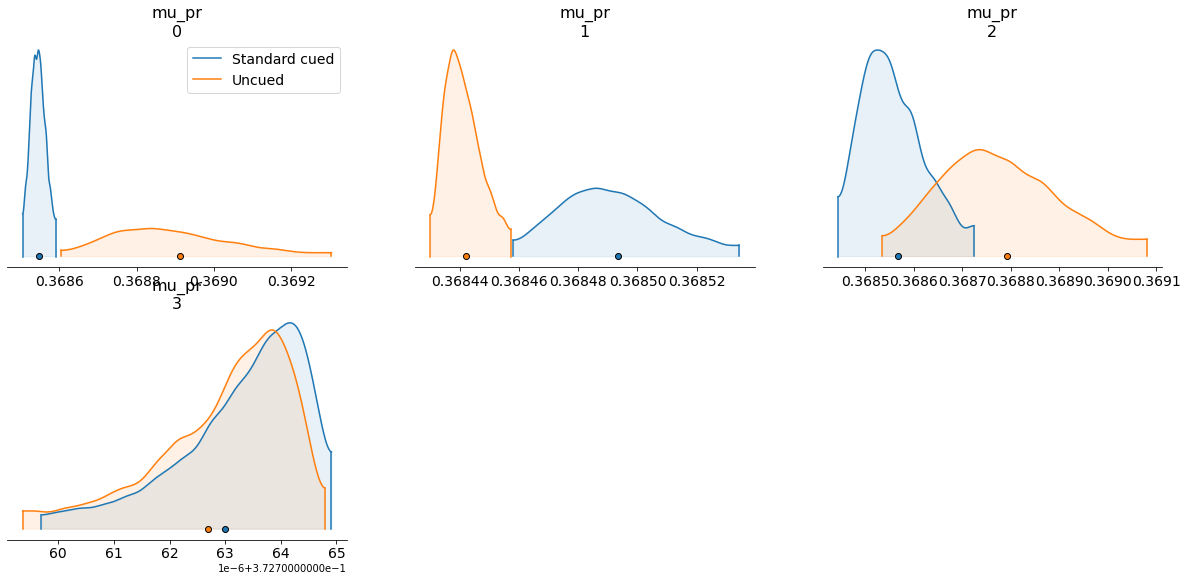

In [15]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([standard_basic_fit,uncued_basic_fit], var_names = 'mu_pr', 
                data_labels = ['Standard cued', 'Uncued'],
                shade = 0.1, 
                hdi_prob = 0.95,
                transform = transform1)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

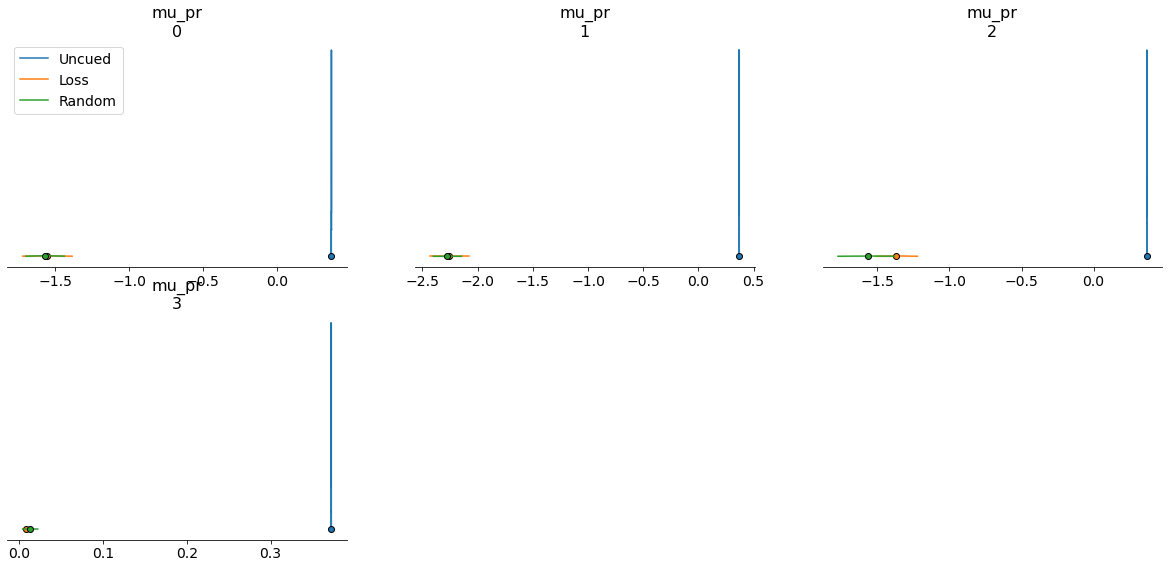

In [16]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([uncued_basic_fit,loss_basic_fit,random_basic_fit], var_names = 'mu_pr', 
                data_labels = ['Uncued', 'Loss', 'Random'],
                shade = 0.1, 
               hdi_prob = 0.95)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')

In [ ]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([standard_basic_fit,outcome_basic_fit,random_basic_fit,reverse_basic_fit,loss_basic_fit], 
                var_names = 'mu_pr', 
                data_labels = ['Standard', 'Outcome','Random','Reverse','Loss'],
                shade = 0.1, 
                hdi_prob = 0.95,
                    transform = transform1)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')

In [ ]:
az.plot_forest(standard_basic_fit)

In [ ]:
az.plot_violin(standard_basic_fit.posterior.beta)

In [ ]:
##WAIC

def softmax(x,beta):
    
    return np.exp(beta*x)/np.sum(np.exp(beta*x))

# calculate pointwise log-likelihood (ie for each datapoint)


#run chosen option through softmax equation, beta*V? with categorical logit PDF? not sure if I then take the maximum of this??

#then need to actually calculate WAIC

#point estimates and standard errors of the expected log pointwise predictive density 

#multiplied by -2